<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Целевой признак Exited - факт ухода клиента. Остальные данные являются признаками. Столбец 'Tenure' (сколько лет человек является клиентом банка) содержит недостающие значения. Расмотри таблицу данных по объектам где остутсвуют значения 'Tenure'.

In [3]:
display(data[data['Tenure'].isnull() == True])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [4]:
display(data['Tenure'].describe())

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

<AxesSubplot:>

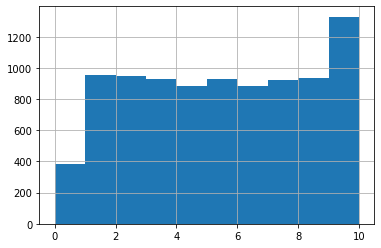

In [5]:
display(data['Tenure'].hist())

Закономерностей среди этих данных не наблюдается. Значения меняются от 0 до 10. Заполним пропуски случайными значениями в этом диапазоне.

In [6]:
data['Tenure'] = data['Tenure'].fillna(value=-1)

Столбцы:
'RowNumber',
'CustomerId',
'Surname' не повлияют на факт ухода клиента. Удалим их.

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Преобразуем категориальные признаки в численные методом прямого кодирования с удалением первого столбца. Выделим target и features.

In [8]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

Проведем масштабирование численных признаков. К численным признакам относятся данные в столбцах 'CreditScore','Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary'. Рассмотрим их корреляцию.

In [9]:
numeric = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
data[numeric].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.003552,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.006315,0.028308,-0.030680,-0.007201
Tenure,0.003552,-0.006315,1.000000,-0.005400,0.009661,0.011174
Balance,0.006268,0.028308,-0.005400,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.009661,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.011174,0.012797,0.014204,1.000000


Значимой корреляции численных признаков не наблюдается. Ничего удалять не требуется.

Масштабируем признаки с помощью метода стандартизации данных

Выделим обучающую, валидационную и тестовую выборки.

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

Масштабируем признаки с помощью метода стандартизации данных

In [11]:
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
scaler.fit(features_valid[numeric]) 
features_valid[numeric] = scaler.transform(features_valid[numeric])
scaler.fit(features_test[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_180/3068078121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## Исследование задачи

In [12]:
#Рассмотрим значения целевого признака
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Наблюдается дисбаланс классов. Положительных исходов почти в 4 раза меньше.

In [13]:
# Рассмотрим значения по столбцу Geography
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Данные по Франции составляют половину от общего значения

In [14]:
# Рассмотрим значения по столбцу Gender
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Доля лиц мужского пола немного больше

In [15]:
# Рассмотрим значения по столбцу Age
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<AxesSubplot:>

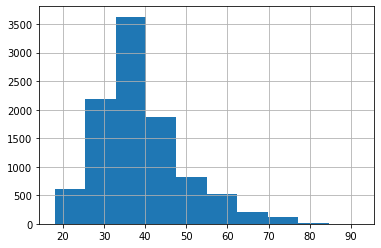

In [16]:
data['Age'].hist()

Имеем скошенное врпаво распределение. Люди с возрастом все реже пользуются услугами банков. Одна из причин это рост смертности, что добавляет положительных исходов в целевой признак.

In [17]:
# Рассмотрим значения по столбцу Balance
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<AxesSubplot:>

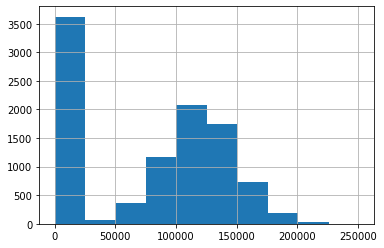

In [18]:
data['Balance'].hist()

Более 35% клиентов имеет нулевой баланс на счетах.

Обучим модели решающего дерева и случайного леса без учета дисбаланса классов

In [19]:
# Обучим модель решающего дерева
best_depth = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        f1_best = f1
        best_depth = depth
        AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)  
print('best_depth =', best_depth)   
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 6
F1: 0.56752655538695
AUC_ROC: 0.8159293547626104


In [20]:
# Обучим модель случайного леса
best_depth = 0
best_est = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(5, 16, 1):
    best_result = 0
    for est in range(50, 100, 10):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)
print('best_depth =', best_depth)   
print('best_est =', best_est)  
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 15
best_est = 50
F1: 0.6038291605301914
AUC_ROC: 0.8455055075339193


Наблюдается дисбаланс классов. Положительных исходов почти в 4 раза меньше. Так же большая часть данных отностится к клиентам банка, проживающим во Франции. Модели, полученные без учета дисбаланса классов показали неплохие результаты. Модель случайного леса дает лучший результат, который на валидационной выборке превышает целевой признак F1 = 0,59.

## Борьба с дисбалансом

Обучим модели с применением аргумента class_weight='balanced'

In [21]:
# Обучим модель решающего дерева
best_depth = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        f1_best = f1
        best_depth = depth
        AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)  
print('best_depth =', best_depth)   
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 5
F1: 0.5963791267305644
AUC_ROC: 0.8310244134068074


In [22]:
# Обучим модель случайного леса
best_depth = 0
best_est = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(1, 16, 1):
    best_result = 0
    for est in range(40, 150, 10):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, class_weight='balanced', random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)
print('best_depth =', best_depth)   
print('best_est =', best_est)  
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 6
best_est = 110
F1: 0.6326742976066597
AUC_ROC: 0.8534908268257129


Метрики моделей немного улучшились.

Обучим модель с применение метода upsempling. Увеличим количесво положительных объектов. Для этого напишем функцию с параметрами features, target и repeat, которая вернет признак и целевой признак после увеличения выборки.

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [24]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Лучший показатель метрик обеспечивается при значении repeat = 3. Прочие расчеты не приведены для уменьшения времени обработки.

In [25]:
# Обучим модель решающего дерева
best_depth = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        f1_best = f1
        best_depth = depth
        AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)  
print('best_depth =', best_depth)   
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 5
F1: 0.586374695863747
AUC_ROC: 0.8229097986317362


In [26]:
# Обучим модель случайного леса
best_depth = 0
best_est = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(5, 15, 1):
    best_result = 0
    for est in range(50, 150, 5):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)
print('best_depth =', best_depth)   
print('best_est =', best_est)  
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 8
best_est = 135
F1: 0.6426914153132249
AUC_ROC: 0.8550196892069273


Метрики моделей немного улучшились. Лучшей моделью по прежнему является случайный лес.

In [27]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


In [28]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

In [29]:
# Обучим модель решающего дерева
best_depth = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        f1_best = f1
        best_depth = depth
        AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)  
        
print('best_depth =', best_depth)   
print('F1:',f1_best, )  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 7
F1: 0.5844004656577416
AUC_ROC: 0.8158431577737587


In [30]:
# Обучим модель случайного леса
best_depth = 0
best_est = 0
f1_best = 0
AUC_ROC_best = 0
for depth in range(5, 15, 1):
    best_result = 0
    for est in range(50, 150, 5):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            AUC_ROC_best = roc_auc_score(target_valid, probabilities_one_valid)
print('best_depth =', best_depth)   
print('best_est =', best_est)  
print('F1:',f1_best)  
print('AUC_ROC:', AUC_ROC_best)  

best_depth = 10
best_est = 145
F1: 0.6332916145181477
AUC_ROC: 0.8499915315239022


Так же были рассмотрены различные варианты соотношения значений repeat и fraction при одновременном использовании двух методов в одной функции, однако лучшего результата добиться не удалось. Лучшей оказывается модель случайного леса обученная на основе данных, полученных с помощью метода upsempling. Однако в зависимости от итерации значения метрик немного меняются. 

## Тестирование модели

In [31]:
model = RandomForestClassifier(n_estimators=135, max_depth=8, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
f1 = f1_score(target_test, predicted_test)
AUC_ROC = roc_auc_score(target_test, probabilities_one_test)
recall = recall_score(target_test, predicted_test)
precision = precision_score(target_test, predicted_test)
print('F1:',f1)  
print('AUC_ROC:', AUC_ROC)  
print('recall:', recall) 
print('precision:', precision) 

F1: 0.6066897347174163
AUC_ROC: 0.8517609070098984
recall: 0.6217494089834515
precision: 0.5923423423423423


Для проверки модели на адекватность найдем метрики для встроенной в sklearn модели DummyClassifier.

In [32]:
model_bl = DummyClassifier(strategy='prior', random_state=12345)
model_bl.fit(features_train, target_train)
predicted_test_dm = model_bl.predict(features_test)
probabilities_test = model_bl.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
f1 = f1_score(target_test, predicted_test_dm)
AUC_ROC = roc_auc_score(target_test, probabilities_one_test)
recall = recall_score(target_test, predicted_test_dm)
precision = precision_score(target_test, predicted_test)
print('F1:',f1)  
print('AUC_ROC:', AUC_ROC)  
print('recall:', recall) 
print('precision:', precision) 

F1: 0.0
AUC_ROC: 0.5
recall: 0.0
precision: 0.5923423423423423


Метрики исходной модели значительно выше. Модель адекватна. Метрика F1 выбранной модели больше заданного значения 0.59. AUC_ROC больше 0,5, а значит классификатор правильно угадывает положительные и отрицательные значения целевого признака.

<br><b>*Вывод:*</b>
<br>При загрузке и исследовании данных было выявлено, что столбец *'Tenure'* (сколько лет человек является клиентом банка) содержит недостающие значения. отдельное рассмотнрение данных с отсутсвующим значением *'Tenure'* не выявило каких либо закономерностей, поэтому пропуски были заполнены значением *(-1)*. Столбцы *'RowNumber', 'CustomerId', 'Surname'* не влияли на факт ухода клиента и были удалены.
<br>Выборка была разбита на обучающую, валидационную и тостовую в соотношении *0.6:0.2:0.2*. Затем произведено масштабирование признаков с помощью метода стандартизации данных.
<br>При исследовании данных был выявлен явный дисбаланс классов. Положительных исходов почти в 4 раза меньше чем отрицательных.
Были обучены модели решающего дерева и случайного леса без учета дисбаланса классов. Метрики модели случайного леса удовлетворяли условию задачи, однако их можно улучшить.
<br> Для преодоления дисбаланса классов применялись следующие способы:
- обучение модели с применением аргумента *class_weight='balanced'*
- метод *upsampling*
- метод *downsampling*

<br> На валидационной выборке по значениям метрик была выбрана лучшая модель - случайный лес с гиперпараметрами *n_estimators=135, max_depth=8*. 
<br> Была проведена проверка модели на адеватность. Метрики исходной модели значительно выше. Модель адекватна. На тестовой выборке метрика *F1* выбранной модели больше заданного значения *0.59*. *AUC_ROC* больше *0.5*, а значит классификатор правильно угадывает положительные и отрицательные значения целевого признака.
